### **Importing libraries & dataset**

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import keras
import random
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://cocl.us/concrete_data')

In [3]:
df.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [11]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

This data set comprises of the details of cement.

*   The features would be **Blast Furnace Slag, Fly Ash,	Water,	Superplasticizer,	Coarse Aggregate,	Fine Aggregate,	Age.**
*   The output would be **Strength**




### **Data exploration**

Plotting heatmap to see the correlation

<Axes: >

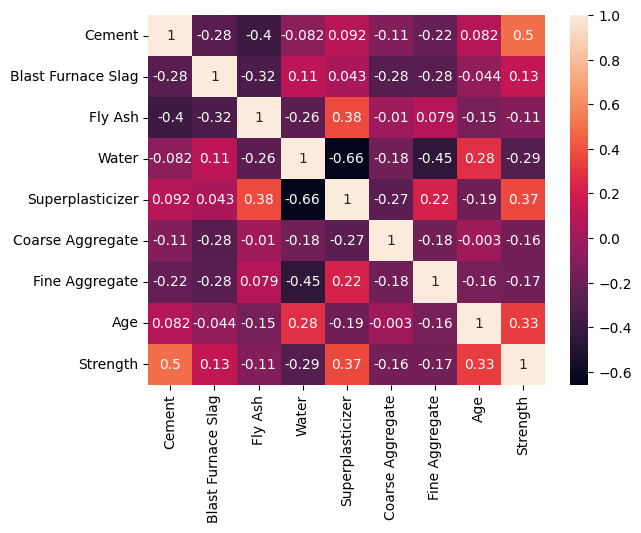

In [8]:
sns.heatmap(df.corr(), annot=True)

In [12]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0



**Project Objective**
---


In this project, a pre-trained VGG model and ResNet model will be employed. Both models will predict the strength of cement, based on the features available.

For comparison purposes, the number of epochs and hidden layers will be manipulated.

At the end of the project, a line plot will be created to show how each model performed, by comparing its MSE.


---



### *Splitting predictors & target*

In [ ]:
x = df.drop('Strength', axis=1)
y = df['Strength']
n_cols = x.shape[1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def reg_model():
  model = keras.Sequential()

  model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

In [ ]:
model = reg_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
mse = []
for i in range (50):
  X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
  res = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
  mean_squared_error = res.history['val_loss'][-1]
  mse.append(mean_squared_error)
  print ("Iteration ", i+1, " MSE: ", mean_squared_error)

Iteration  1  MSE:  343.3341979980469
Iteration  2  MSE:  161.81639099121094
Iteration  3  MSE:  132.80650329589844
Iteration  4  MSE:  125.7887954711914
Iteration  5  MSE:  141.88873291015625
Iteration  6  MSE:  122.91536712646484
Iteration  7  MSE:  120.12134552001953
Iteration  8  MSE:  121.34127044677734
Iteration  9  MSE:  131.1528778076172
Iteration  10  MSE:  123.67809295654297
Iteration  11  MSE:  120.90496063232422
Iteration  12  MSE:  120.17830657958984
Iteration  13  MSE:  127.72547912597656
Iteration  14  MSE:  126.03299713134766
Iteration  15  MSE:  122.03790283203125
Iteration  16  MSE:  156.39752197265625
Iteration  17  MSE:  124.8386459350586
Iteration  18  MSE:  121.07544708251953
Iteration  19  MSE:  122.20824432373047
Iteration  20  MSE:  121.7824478149414
Iteration  21  MSE:  120.3804702758789
Iteration  22  MSE:  120.663330078125
Iteration  23  MSE:  122.16585540771484
Iteration  24  MSE:  124.99988555908203
Iteration  25  MSE:  121.17339324951172
Iteration  26  MS

In [ ]:
A = mean_mse = np.mean(mse)
std = np.std(mse)

print ("Mean of the model's mean squared error is", mean_mse)
print ("Standard deviation of the model is", std)

Mean of the model's mean squared error is 108.96883583068848
Standard deviation of the model is 46.01915846107606


# **Section B: Normalize the data**

In [ ]:
norm_x = (x - x.mean()) / x.std()

In [ ]:
norm_mse = []

for i in range (50):
  X_train, X_test, y_train, y_test = train_test_split(norm_x,y,test_size=0.3, random_state=1)
  res = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
  mean_squared_error = res.history['val_loss'][-1]
  norm_mse.append(mean_squared_error)
  print ("Iteration ", i+1, " MSE: ", mean_squared_error)

Iteration  1  MSE:  247.9787139892578
Iteration  2  MSE:  187.0441131591797
Iteration  3  MSE:  153.5724334716797
Iteration  4  MSE:  121.85282897949219
Iteration  5  MSE:  90.38479614257812
Iteration  6  MSE:  73.37084197998047
Iteration  7  MSE:  64.34508514404297
Iteration  8  MSE:  57.60750961303711
Iteration  9  MSE:  53.939186096191406
Iteration  10  MSE:  51.861061096191406
Iteration  11  MSE:  50.629615783691406
Iteration  12  MSE:  49.96759033203125
Iteration  13  MSE:  49.24909210205078
Iteration  14  MSE:  48.23743438720703
Iteration  15  MSE:  47.337215423583984
Iteration  16  MSE:  47.16927719116211
Iteration  17  MSE:  46.90089797973633
Iteration  18  MSE:  46.74015808105469
Iteration  19  MSE:  46.6656494140625
Iteration  20  MSE:  46.916969299316406
Iteration  21  MSE:  46.597984313964844
Iteration  22  MSE:  46.03805160522461
Iteration  23  MSE:  45.830509185791016
Iteration  24  MSE:  45.471214294433594
Iteration  25  MSE:  45.42067337036133
Iteration  26  MSE:  45.52

In [ ]:
B = mean_nmse = np.mean(norm_mse)
nstd = np.std(norm_mse)

print ("Mean of the model's mean squared error is", mean_nmse)
print ("Standard deviation of the model is", nstd)

Mean of the model's mean squared error is 58.7653247833252
Standard deviation of the model is 38.27315640560406


# **Section C: Increase number of epochs**




In [ ]:
norm_mse = []

for i in range (50):
  X_train, X_test, y_train, y_test = train_test_split(norm_x,y,test_size=0.3, random_state=1)
  res = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
  mean_squared_error = res.history['val_loss'][-1]
  norm_mse.append(mean_squared_error)
  print ("Iteration ", i+1, " MSE: ", mean_squared_error)

Iteration  1  MSE:  43.987091064453125
Iteration  2  MSE:  43.79536819458008
Iteration  3  MSE:  43.473114013671875
Iteration  4  MSE:  43.3762092590332
Iteration  5  MSE:  43.228904724121094
Iteration  6  MSE:  43.175994873046875
Iteration  7  MSE:  42.98021697998047
Iteration  8  MSE:  42.8033332824707
Iteration  9  MSE:  42.534034729003906
Iteration  10  MSE:  42.47438049316406
Iteration  11  MSE:  42.36823272705078
Iteration  12  MSE:  42.27092361450195
Iteration  13  MSE:  42.21588897705078
Iteration  14  MSE:  42.14927291870117
Iteration  15  MSE:  42.23699951171875
Iteration  16  MSE:  42.08699035644531
Iteration  17  MSE:  41.870967864990234
Iteration  18  MSE:  42.013790130615234
Iteration  19  MSE:  41.7413330078125
Iteration  20  MSE:  41.600257873535156
Iteration  21  MSE:  41.43396759033203
Iteration  22  MSE:  41.39807891845703
Iteration  23  MSE:  41.15651321411133
Iteration  24  MSE:  41.10691452026367
Iteration  25  MSE:  41.22211456298828
Iteration  26  MSE:  40.96867

In [ ]:
C= mean_nmse = np.mean(norm_mse)
nstd = np.std(norm_mse)

print ("Mean of the model's mean squared error is", mean_nmse)
print ("Standard deviation of the model is", nstd)

Mean of the model's mean squared error is 40.73686645507812
Standard deviation of the model is 1.9875693256886096


# **Section D: Add hidden layers**

In [ ]:
def reg_model2():
  model = keras.Sequential()

  model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

In [ ]:
model2 = reg_model2()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
norm_mse = []

for i in range (50):
  X_train, X_test, y_train, y_test = train_test_split(norm_x,y,test_size=0.3, random_state=1)
  res2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
  mean_squared_error = res2.history['val_loss'][-1]
  norm_mse.append(mean_squared_error)
  print ("Iteration ", i+1, " MSE: ", mean_squared_error)

Iteration  1  MSE:  110.7291030883789
Iteration  2  MSE:  53.686866760253906
Iteration  3  MSE:  45.48454284667969
Iteration  4  MSE:  44.85730743408203
Iteration  5  MSE:  45.13148880004883
Iteration  6  MSE:  44.15786361694336
Iteration  7  MSE:  42.33121109008789
Iteration  8  MSE:  41.696922302246094
Iteration  9  MSE:  41.654815673828125
Iteration  10  MSE:  40.171993255615234
Iteration  11  MSE:  41.171607971191406
Iteration  12  MSE:  38.888816833496094
Iteration  13  MSE:  38.5450325012207
Iteration  14  MSE:  37.56602096557617
Iteration  15  MSE:  37.9227294921875
Iteration  16  MSE:  36.12028121948242
Iteration  17  MSE:  36.121543884277344
Iteration  18  MSE:  36.264312744140625
Iteration  19  MSE:  36.849124908447266
Iteration  20  MSE:  38.39927291870117
Iteration  21  MSE:  37.258453369140625
Iteration  22  MSE:  37.09879684448242
Iteration  23  MSE:  36.16964340209961
Iteration  24  MSE:  35.696022033691406
Iteration  25  MSE:  35.96465301513672
Iteration  26  MSE:  35.6

In [ ]:
D = mean_nmse = np.mean(norm_mse)
nstd = np.std(norm_mse)

print ("Mean of the model's mean squared error is", mean_nmse)
print ("Standard deviation of the model is", nstd)

Mean of the model's mean squared error is 40.588415908813474
Standard deviation of the model is 10.519987322915041


# **Comparison**

In [ ]:
print (A,B,C,D)

108.96883583068848 58.7653247833252 40.73686645507812 40.588415908813474


Text(0, 0.5, 'Mean Squared Error')

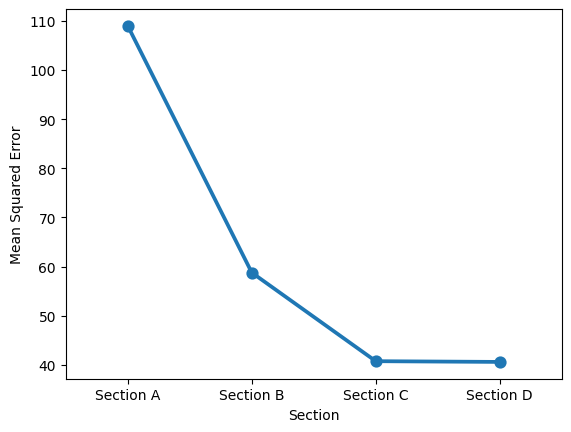

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(x=['Section A', 'Section B','Section C','Section D'], y=[A,B,C,D])
plt.xlabel('Section')
plt.ylabel('Mean Squared Error')



---
As shown in the plot above, the Model B performed relatively better than Model A, after using normalized data.

Increasing the number of epochs also helped in better performance of the models. However, it is observed that Model C and Model D had similar MSE, which might mean that the Model C is performing well, and might not need the additional hidden layers.

---

The flaw in these models are the steep learning rate from Model A to Model B. It may be improved by fine-tuning the hyperparameters to better fit the model for this specific project.


---

**Thanks!**

---



